<a href="https://colab.research.google.com/github/AnjaliRai24/KNN-model-/blob/main/KNN_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib.colors import ListedColormap


In [20]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"

# Column names from UCI documentation
cols = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']
df = pd.read_csv(url, names=cols, index_col='Id')

print("✅ Dataset Loaded Successfully!\n")
display(df.head())

✅ Dataset Loaded Successfully!



,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
Id,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [21]:
print("\n🔍 Dataset Info:")
print(df.info())

print("\n📈 Statistical Summary:")
display(df.describe())


🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 1 to 214
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.4 KB
None

📈 Statistical Summary:


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [22]:
print("\n❓ Missing Values per Column:")
print(df.isnull().sum())


❓ Missing Values per Column:
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


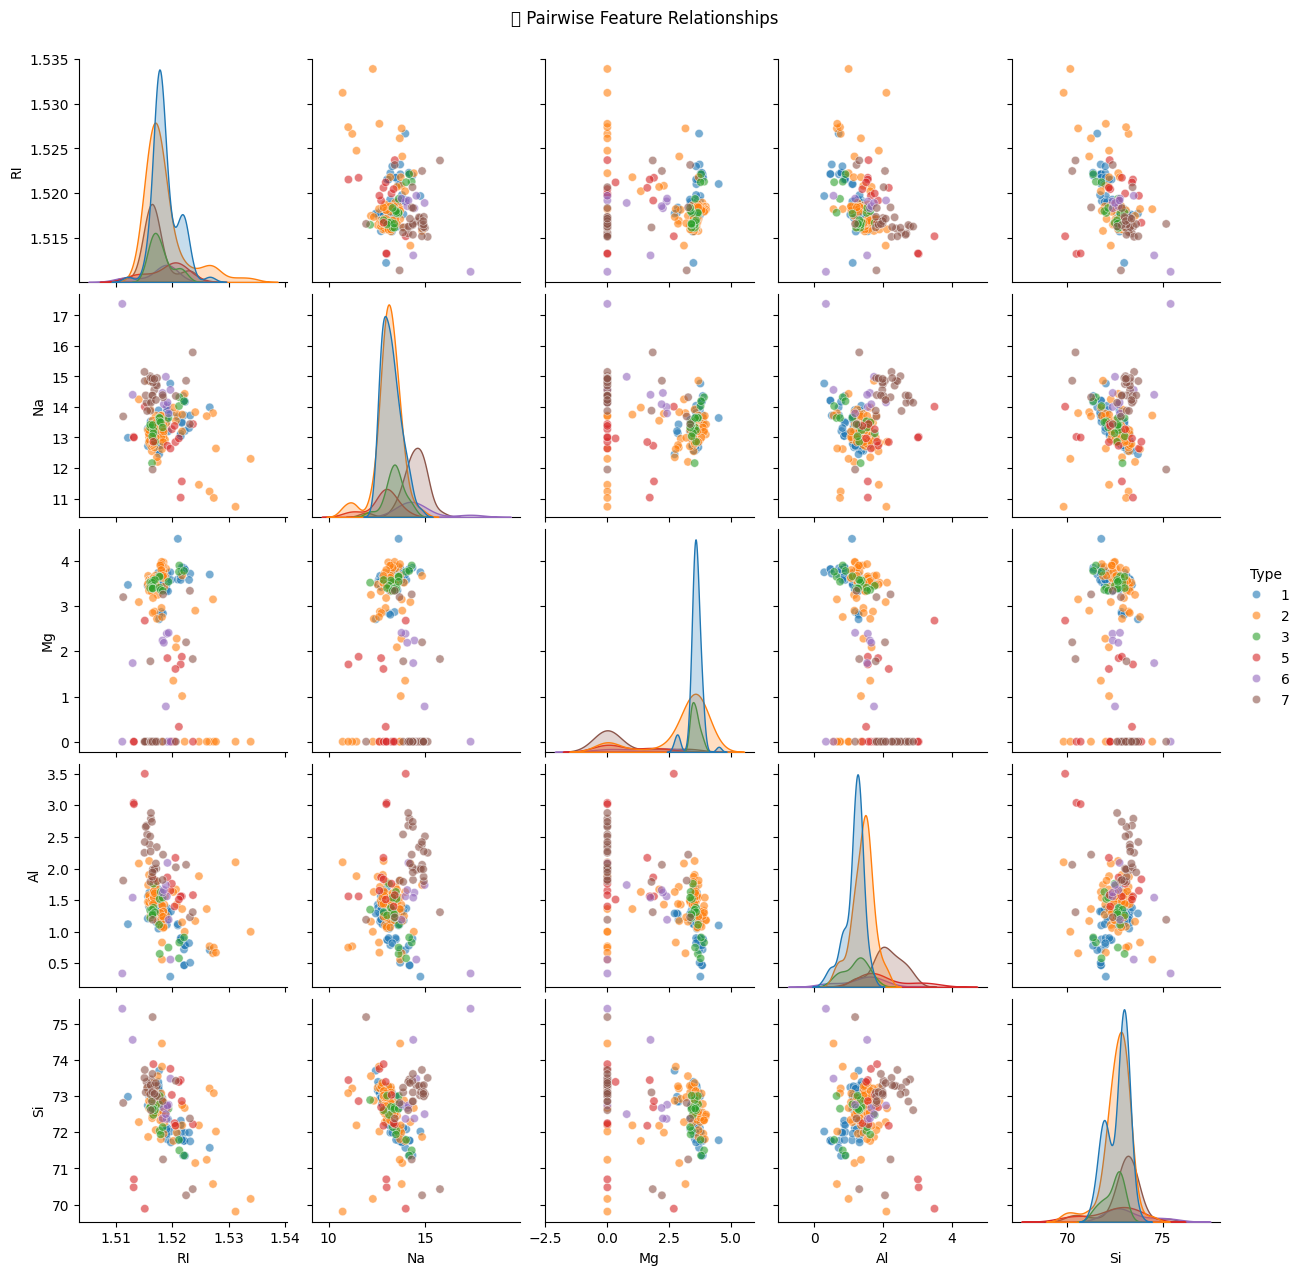

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


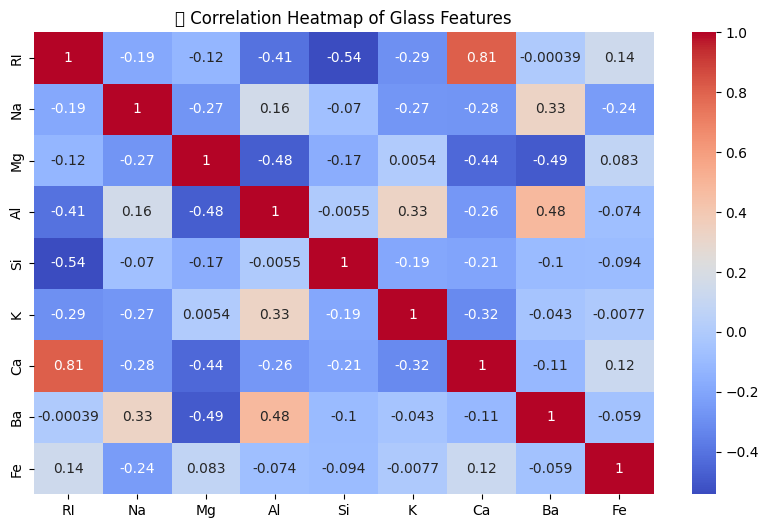

In [23]:
df['Type'] = df['Type'].astype(str)

# Pairplot (subset for visualization)
subset_cols = ['RI','Na','Mg','Al','Si','Type']
sns.pairplot(df[subset_cols], hue='Type', diag_kind='kde', plot_kws={'alpha':0.6})
plt.suptitle("🔍 Pairwise Feature Relationships", y=1.02)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.drop('Type', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("🔥 Correlation Heatmap of Glass Features")
plt.show()

In [24]:
X = df.drop('Type', axis=1)
y = df['Type']

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("\n📊 Dataset Split Done:")
print(f"Training: {X_train.shape}, Testing: {X_test.shape}")


📊 Dataset Split Done:
Training: (171, 9), Testing: (43, 9)


In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

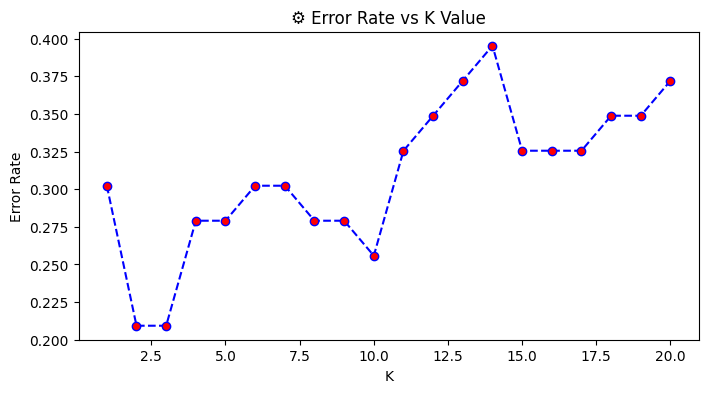


✅ Best K Value Found: 2


In [26]:
error_rate = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    pred_k = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_k != y_test))

plt.figure(figsize=(8,4))
plt.plot(range(1,21), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red')
plt.title('⚙️ Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

best_k = error_rate.index(min(error_rate)) + 1
print(f"\n✅ Best K Value Found: {best_k}")

In [27]:
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)
y_pred = knn_final.predict(X_test_scaled)


🎯 Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.93      0.84        14
           2       0.75      0.80      0.77        15
           3       1.00      0.33      0.50         3
           5       0.67      0.67      0.67         3
           6       1.00      0.50      0.67         2
           7       1.00      0.83      0.91         6

    accuracy                           0.79        43
   macro avg       0.86      0.68      0.73        43
weighted avg       0.81      0.79      0.78        43



/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


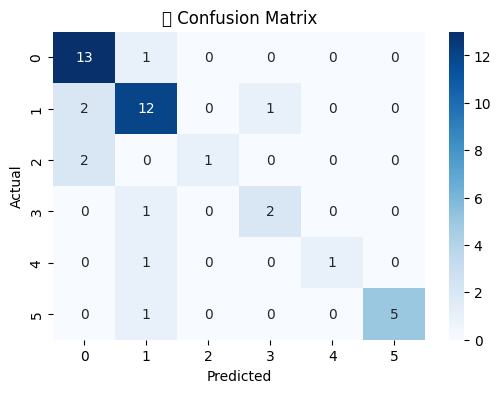


✅ Model Accuracy: 79.07%


In [28]:
print("\n🎯 Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("🧾 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {acc*100:.2f}%")

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


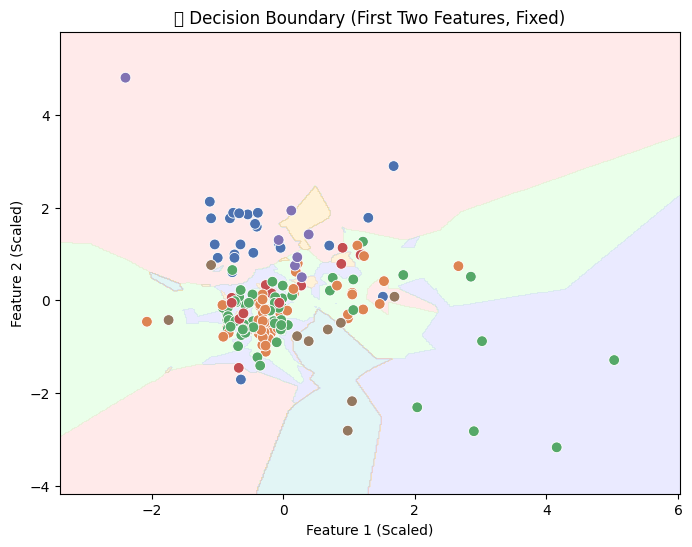

In [30]:

X_vis = X_train_scaled[:, :2]

y_vis = pd.factorize(y_train)[0]

knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_vis, y_vis)

x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure(figsize=(8,6))
cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB', '#BBBBFF', '#FFD580', '#E0B0FF', '#A0E0E0'])
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=y_vis, palette='deep', s=60, legend=False)
plt.title("🌈 Decision Boundary (First Two Features, Fixed)")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.show()


In [31]:
print("\n K'S nearest neighbor model is successfully done!" )


 K'S nearest neighbor model is successfully done!
